In [7]:
import numpy as np
import pandas as pd
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
df1=pd.read_excel("embeddingsdata.xlsx")
X=np.array(df1)
df2=pd.read_excel("Dataset to B.tech (1).xlsx")
y=np.array(df2['Label'])
# Training data (you can replace this with your own dataset)
# Here, we use a simple AND gate as an example.
inputs = [[row[0], row[1]] for row in X]

# Target values
targets = y

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, inputs, targets):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(inputs)):
            x1, x2 = inputs[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, targets)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, inputs, targets):
    correct = 0
    for i in range(len(inputs)):
        x1, x2 = inputs[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(inputs)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs, targets)

Trained Weights:
W0: 3389.999999998442, W1: 29.53347253888946, W2: -68.18295461157426

Testing the Trained Perceptron:
Input: (0.009624697268009186, -0.02921622432768345), Target: 0, Prediction: 1
Input: (-0.007534713018685579, -0.03984416276216507), Target: 0, Prediction: 1
Input: (0.02240767888724804, -0.03083997406065464), Target: 0, Prediction: 1
Input: (0.01967672631144524, -0.03405537083745003), Target: 0, Prediction: 1
Input: (0.01767829991877079, -0.03032254800200462), Target: 0, Prediction: 1
Input: (0.02049018628895283, -0.03338756784796715), Target: 1, Prediction: 1
Input: (-0.001626732992008328, -0.03068180941045284), Target: 0, Prediction: 1
Input: (0.01709581539034843, -0.03876746073365211), Target: 0, Prediction: 1
Input: (0.01642303913831711, -0.02848420664668083), Target: 1, Prediction: 1
Input: (0.003272214904427528, -0.02066625654697418), Target: 0, Prediction: 1
Input: (-0.00677562179043889, -0.03031325154006481), Target: 0, Prediction: 1
Input: (0.00300259864889085

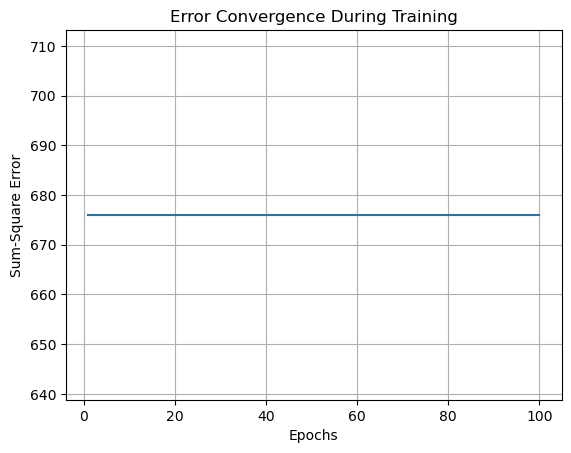

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(error_values) + 1), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Error Convergence During Training')
plt.grid(True)
plt.show()
